# Set up

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

We have some notes when training these 3 models:
- `LinearSVC` uses `loss="squared_hinge"` by default, so if we want all 3 models perform similarly, then we need to set `loss="hinge"`.
- Also, `SVC` has `kernel="rbf"` by default, so we need to set `kernel="linear"` to have a similar result across all the models.
- Finally, `SGDClassifier` class does not have `C` hyperparameter, instead it has a very similar regularization hyperparameter `alpha`. We need to tweak it in order to obtain the same result as these two models.

In [3]:
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

C = 5
alpha = 0.05

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lin_clf = LinearSVC(loss="hinge", C=C, random_state=42).fit(X_scaled, y)
svc_clf = SVC(kernel="linear", C=C, random_state=42).fit(X_scaled, y)
sgd_clf = SGDClassifier(alpha=alpha, random_state=42).fit(X_scaled, y)

/home/daoxuantan/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [5]:
def compute_decision_boundary(clf):
    w = -clf.coef_[0, 0] / clf.coef_[0, 1]
    b = -clf.intercept_[0] / clf.coef_[0, 1]
    return scaler.inverse_transform([[-10, -10 * w + b], [10, 10 * w + b]])


lin_line = compute_decision_boundary(lin_clf)
svc_line = compute_decision_boundary(svc_clf)
sgd_line = compute_decision_boundary(sgd_clf)

(0.0, 5.5, 0.0, 2.0)

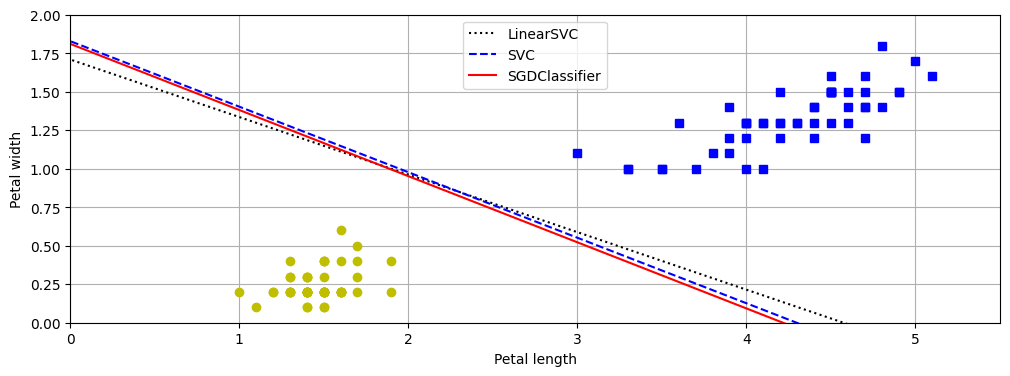

In [13]:
plt.figure(figsize=(12, 4))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "yo")
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "bs")
plt.plot(lin_line[:, 0], lin_line[:, 1], "k:", label="LinearSVC")
plt.plot(svc_line[:, 0], svc_line[:, 1], "b--", label="SVC")
plt.plot(sgd_line[:, 0], sgd_line[:, 1], "r-", label="SGDClassifier")
plt.legend(loc="upper center")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.grid()
plt.axis([0, 5.5, 0, 2])